# 1. Import librairies

In [31]:
import pandas as pd
import numpy as np
import os
import wave
import librosa 
import kerascnn2c
from pathlib import Path
import tensorflow as tf
import copy
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Sequential
import tensorflow.keras.layers as layers
from keras.layers import Input, Conv1D, AvgPool1D, MaxPool1D, ZeroPadding1D, BatchNormalization, Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
#train data creator

# 2. Create train_data

In [ ]:
ID=[]
label=[]
# assign directory
directory = 'inputs/cats_dogs/train/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):                               #go into the directory
    for filename in os.listdir(directory+str(folder)):          #go in every class 
        f = os.path.join(directory+str(folder), filename)    #scan through every file in that class
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])
            
train_data=pd.DataFrame()
train_data['ID']=ID
train_data['label']=label
print(train_data)

                      ID label
0            cat_113.wav   cat
1             cat_44.wav   cat
2             cat_74.wav   cat
3            cat_100.wav   cat
4            cat_109.wav   cat
..                   ...   ...
205   dog_barking_30.wav   dog
206   dog_barking_92.wav   dog
207  dog_barking_105.wav   dog
208   dog_barking_79.wav   dog
209   dog_barking_16.wav   dog

[210 rows x 2 columns]


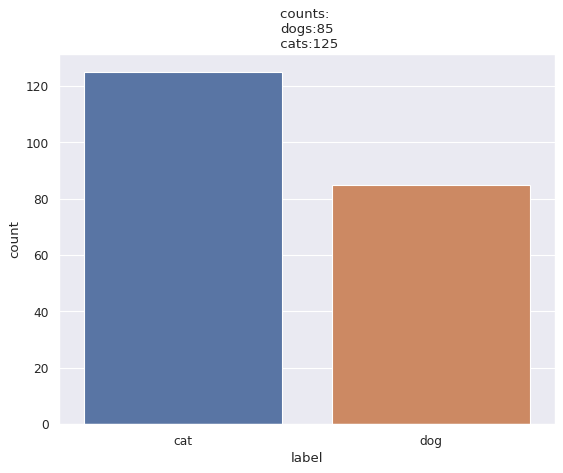

In [ ]:
#HERE WE JUST SHOWING THE AMOUNT OF DATAS 85 DOGS & 125 CATS
plt.figure(figsize=(8,6),dpi=80)
sns.set_theme(style="darkgrid")
sns.countplot(x='label',data=train_data)
plt.title('counts: \n' +'dogs:'+str(train_data.label.value_counts()[1])+
          '\n cats:'+str(train_data.label.value_counts()[0]))
plt.show()

# 3. Create test_data

In [ ]:
ID=[]
label=[]
# assign directory
directory = 'inputs/cats_dogs/test/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):
    for filename in os.listdir(directory+str(folder)):
        f = os.path.join(directory+str(folder), filename)
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])
            
# WE CHANGE LABELS NAMES FROM TEST TO DOG            
for i in range(len(label)):
    if(label[i]=='test'):
        label[i]='dogs'
        
test_data=pd.DataFrame()
test_data['ID']=ID
test_data['label']=label
print(test_data)

                    ID label
0   dog_barking_62.wav  dogs
1    dog_barking_8.wav  dogs
2   dog_barking_82.wav  dogs
3   dog_barking_91.wav  dogs
4   dog_barking_43.wav  dogs
..                 ...   ...
62          cat_14.wav  cats
63         cat_148.wav  cats
64         cat_110.wav  cats
65          cat_86.wav  cats
66          cat_24.wav  cats

[67 rows x 2 columns]


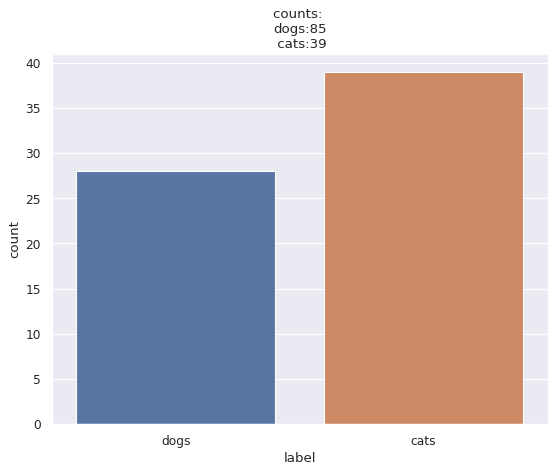

In [84]:
plt.figure(figsize=(8,6),dpi=80)
sns.set_theme(style="darkgrid")
sns.countplot(x='label',data=test_data)
plt.title('counts: \n' +'dogs:'+str(train_data.label.value_counts()[1])+
          '\n cats:'+str(test_data.label.value_counts()[0]))
plt.show()

# 4. Feature extraction of audio files using MFCCs

This function will access the audio files directly from the dataset and automatically store the features for each file in train set

In librosa.load function if we dont write sr=None, it will upsample every audio file to 22Khz which we dont want here.

We are using 100 Mel freq cepstrum coeff. for each audio file.

In [74]:
def extract_features(directory):
    features=[]
    ID=[]
    for folder in os.listdir(directory):
        for filename in os.listdir(directory+str(folder)):
            f = os.path.join(directory+str(folder), filename)
            
            if os.path.isfile(f):
                y,sr=librosa.load(f, res_type='kaiser_fast',sr=None)
                mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=100).T, axis=0)
    
                features.append(mfccs)
                ID.append(f.split('/')[-1])
    return [ID, features]

call on train data set

In [75]:
ID, features_train=extract_features('inputs/cats_dogs/train/')
ID, features_test=extract_features('inputs/cats_dogs/test/')

In [ ]:
Création des donnée de train et de test

In [76]:
X_train=np.array(features_train)
X_test=np.array(features_test)
Y_train=train_data.label
Y_test=test_data.label
print(type(X_train))
print(type(features_train))

<class 'numpy.ndarray'>
<class 'list'>


In [77]:
le=LabelEncoder()

temp=le.fit_transform(Y_train)
Y_train=temp.reshape(-1,1)

temp=le.fit_transform(Y_test)
Y_test=temp.reshape(-1,1)

In [78]:
model=tf.keras.Sequential()
model.add(layers.Input(shape=(100, 1)))
model.add(layers.MaxPool1D(pool_size=4, strides=3, padding='valid'))
model.add(layers.Conv1D(filters=64, kernel_size=8, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=1))
model.add(layers.Dense(1,activation='sigmoid'))

In [79]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
hist = model.fit(X_train, Y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 5ms/step - loss: 0.6978 - accuracy: 0.4857
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.7952
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.8381
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4128 - accuracy: 0.8476
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3805 - accuracy: 0.8667
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3583 - accuracy: 0.8762
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8714
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3360 - accuracy: 0.8762
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3256 - accuracy: 0.8762
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.8905
Epoch 11/100
7/7 [===========

In [81]:
model.save('cat_dogs.h5')

model = tf.keras.Model(model.input, model.layers[-2].output, name=model.name)

res = kerascnn2c.Converter(output_path=Path('gsc_output_fixed'),
                           fixed_point=9, # Number of bits for the fractional part, Q7.9 format
                           number_type='int16_t', # Data type for weights/activations (16 bits quantization)
                           long_number_type='int32_t', # Data type for intermediate results
                           number_min=-(2**15), # Minimum value for 16-bit signed integers
                           number_max=(2**15)-1 # Maximum value for 16-bit signed integers
                          ).convert_model(copy.deepcopy(model))
with open('gsc_model_fixed.h', 'w') as f:
    f.write(res)

———————————————————————————————————————————————————————————————————————————————————————————————————————
Inputs                           | Layer                            | Outputs                         
———————————————————————————————————————————————————————————————————————————————————————————————————————
                                 | input_7                          | max_pooling1d_9                 
-------------------------------------------------------------------------------------------------------
input_7                          | max_pooling1d_9                  | conv1d_8                        
-------------------------------------------------------------------------------------------------------
max_pooling1d_9                  | conv1d_8                         | flatten_6                       
-------------------------------------------------------------------------------------------------------
conv1d_8                         | flatten_6                        

In [82]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 33, 1)            0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 26, 64)            576       
                                                                 
 flatten_6 (Flatten)         (None, 1664)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 1665      
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
____________________________________________________

In [ ]:
Y_pred=model.predict(X_test)
Y_pred=(Y_pred>0.5)*1
print(classification_report(Y_test,Y_pred))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.86      0.86      0.86        28

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67



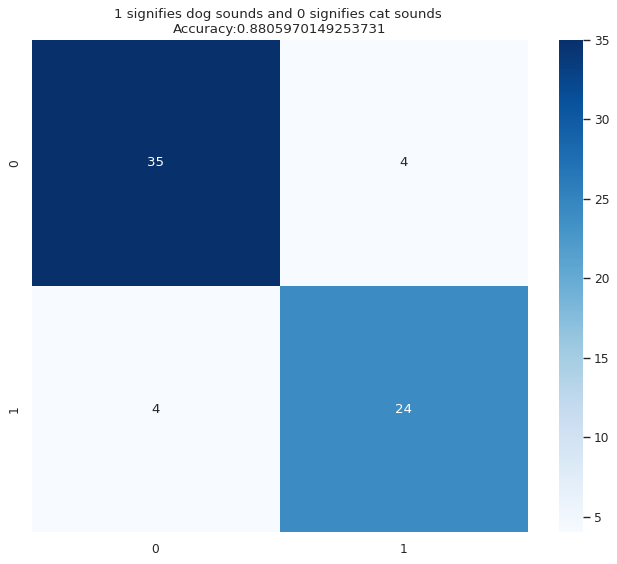

In [83]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred)))
plt.show()

In [ ]:
!g++ -Wall -Wextra -pedantic -Ofast -o gsc_fixed -Igsc_output_fixed/ gsc_output_fixed/model.c main.cpp 

gsc_output_fixed/model.c: In function ‘void cnn(const number_t (*)[100], number_t*)’:
gsc_output_fixed/model.c:68:18: warning: left operand of comma operator has no effect [-Wunused-value]
   68 |     activations2.conv1d_1_output,
      |     ~~~~~~~~~~~~~^~~~~~~~~~~~~~~


In [ ]:
!./gsc_fixed x_test_gsc_250.csv y_test_gsc_250.csv

Error opening "x_test_gsc_250.csv": No such file or directory
